In [116]:
import pandas as pd
import numpy as np
import networkx as nx
import collections as c
import matplotlib.pyplot as plt
from operator import truediv

%matplotlib inline

In [2]:
df=pd.read_csv('../data/bbAllConvoLinesDFmore.csv',sep=';')

/home/mako0970/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (124,125,127,128,129,131,132,133,135,136,137,139,140,141,143,144,145,147,148,149,151,152,153,155,156,157,159,160,161,163,164,165,167,168,169,171,172,173,175,176,177,179,180,181,183,184,185,187,188,189,191,192,193) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
len(df)

10373

In [11]:
df.columns

Index([u'Unnamed: 0', u'id', u'username', u'user_id', u'geo_enabled',
       u'followCount', u'friendCount', u'faveCount', u'tweetCount', u'date',
       ...
       u'reply43OrigText', u'reply43OrigReplyWhat', u'reply43OrigReplyWho',
       u'dateObj', u'repSecDiff', u'repSet', u'lenRepSet', u'convNames',
       u'convStart', u'branchConvo'],
      dtype='object', length=203)

### Limit data to the time frame of analysis

In [12]:
df=df[(pd.to_datetime(df.replyOrigTime)>=pd.to_datetime('2012-10-15 00:00:00')) & (pd.to_datetime(df.date)<pd.to_datetime('2012-11-23 00:00:00'))]

In [33]:
len(df)

8846

In [13]:
userEdgeList=df[['username', 'replyWho']]

In [36]:
weighted=userEdgeList.groupby(['username', 'replyWho']).size()

In [39]:
weighted.to_csv('../data/replyUserNetOverall.csv',sep=',', header=False, index=True)

In [15]:
before=df[(pd.to_datetime(df.replyOrigTime)>=pd.to_datetime('2012-10-15 00:00:00')) & (pd.to_datetime(df.date)<pd.to_datetime('2012-10-25 00:00:00'))]

In [17]:
during=df[(pd.to_datetime(df.replyOrigTime)>=pd.to_datetime('2012-10-25 00:00:00')) & (pd.to_datetime(df.date)<pd.to_datetime('2012-11-04 00:00:00'))]

In [19]:
after=df[(pd.to_datetime(df.replyOrigTime)>=pd.to_datetime('2012-11-04 00:00:00')) & (pd.to_datetime(df.date)<pd.to_datetime('2012-11-14 00:00:00'))]

In [20]:
lafter=df[(pd.to_datetime(df.replyOrigTime)>=pd.to_datetime('2012-11-14 00:00:00')) & (pd.to_datetime(df.date)<pd.to_datetime('2012-11-23 00:00:00'))]

In [21]:
bUserEdgeList=before[['username', 'replyWho']]

In [40]:
bWeighted=bUserEdgeList.groupby(['username', 'replyWho']).size()

In [41]:
bWeighted.to_csv('../data/replyUserNetBefore.csv',sep=',', header=False, index=True)

In [23]:
dUserEdgeList=during[['username', 'replyWho']]

In [42]:
dWeighted=dUserEdgeList.groupby(['username', 'replyWho']).size()

In [43]:
dWeighted.to_csv('../data/replyUserNetDuring.csv',sep=',', header=False, index=True)

In [25]:
aUserEdgeList=after[['username', 'replyWho']]

In [44]:
aWeighted=aUserEdgeList.groupby(['username', 'replyWho']).size()

In [45]:
aWeighted.to_csv('../data/replyUserNetAfter.csv',sep=',', header=False, index=True)

In [27]:
laUserEdgeList=lafter[['username', 'replyWho']]

In [46]:
laWeighted=laUserEdgeList.groupby(['username', 'replyWho']).size()

In [47]:
laWeighted.to_csv('../data/replyUserNetLafter.csv',sep=',', header=False, index=True)

## Overall network analysis

In [48]:
G=nx.read_weighted_edgelist('../data/replyUserNetOverall.csv',delimiter=',',create_using=nx.DiGraph())

In [49]:
len(G)

2755

In [50]:
G.number_of_edges()

3755

In [67]:
str_comps=nx.strongly_connected_component_subgraphs(G)

In [68]:
len(list(str_comps))

1865

In [59]:
weak_comps=nx.weakly_connected_component_subgraphs(G)

In [60]:
len(list(weak_comps))

1046

In [70]:
strong=sorted(nx.strongly_connected_component_subgraphs(G), key = len, reverse=True)

In [73]:
len(strong[0])

289

In [74]:
weak=sorted(nx.weakly_connected_component_subgraphs(G), key = len, reverse=True)

In [75]:
len(weak[0])

992

In [80]:
len(weak[0])/float(len(G))

0.3600725952813067

In [81]:
len(strong[0])/float(len(G))

0.10490018148820326

**Takeway:**
* More than one third of the local users talk to each other in some way (over the whole time period)
* 10% of the local users talk to each other so you can get to them from one reply to another
* Considering that these are replies (not mentions, not RTs) - this is pretty remarkable

In [82]:
degree=nx.degree(G)

(0.0, 30)

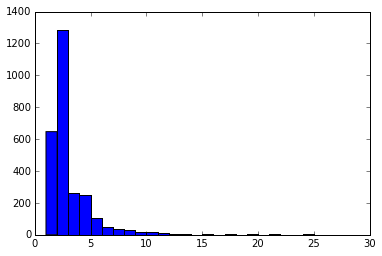

In [89]:
plt.hist(degree.values(), max(degree.values())-1)
plt.xlim(xmax=30)

* While the highest degree is 80 (cut off), overall this is not super long-tailed
* Also really interesting that the highest peak is 2
* So most local users talk to 2 other local users
* And then it looks a bit step-wise (noise?)

### Incorporate  edge weights into the degree distribution

In [96]:
A=nx.adjacency_matrix(G)
strength=A.sum(axis=1)

(0.0, 40)

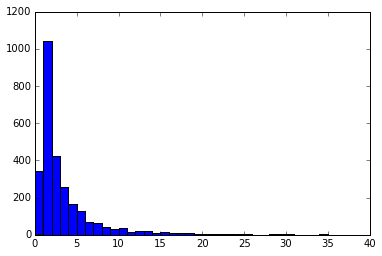

In [103]:
plt.hist(strength, 125)
plt.xlim(xmax=40)

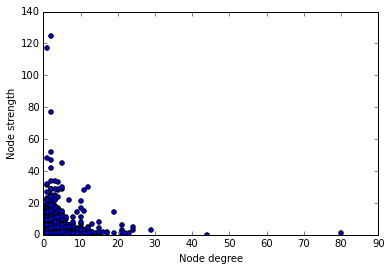

In [113]:
plt.scatter(degree.values(), strength.tolist())
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel('Node degree')
plt.ylabel('Node strength')

* So the really high degree users have low strength - many infrequent contacts
* And the really frequent interactions happen to the low-degree users - few high-frequency conversation partners 

In [130]:
ratio=[x[0]/y for x, y in zip(strength.tolist(), degree.values())]

In [138]:
degree

{u'LaurenLaCapra': 1,
 u'healysnow': 2,
 u'KimClune': 1,
 u'saetre_hanssen': 2,
 u'jenbee': 4,
 u'AAlampi': 2,
 u'kim617': 10,
 u'libbylt': 2,
 u'GregSleter': 5,
 u'marijopuleo': 3,
 u'tsaponaro83': 1,
 u'MariaJesusV': 5,
 u'Rosie22572': 2,
 u'therealPhillyD': 2,
 u'kcimc': 4,
 u'devin04': 3,
 u'dcilea': 6,
 u'MTTeloki': 2,
 u'markdorison': 2,
 u'sgnyco': 1,
 u'ThisMikeLee': 2,
 u'ChloeTroia': 2,
 u'SRuhle': 3,
 u'NBCPhiladelphia': 7,
 u'RachidRouis': 2,
 u'corweezy30': 4,
 u'M3lissaSays': 4,
 u'loloaguilera': 2,
 u'JackReichert': 3,
 u'jeneralcuster': 2,
 u'brightfactor': 1,
 u'Dani_Marie92': 2,
 u'GoHildy': 1,
 u'JohnSurico': 1,
 u'MIKESMD77': 2,
 u'rabbilaufer': 1,
 u'litt1ed0g_red': 2,
 u'ErrieWirriams': 3,
 u'BobbyCz123': 3,
 u'spiceyhotbj': 2,
 u'_eddylir': 2,
 u'PatPizzy': 4,
 u'jessheehan': 4,
 u'RealtimeRyan': 2,
 u'msorvam': 2,
 u'AmbieeeDawnx3': 2,
 u'JarrettBarrios': 1,
 u'AmyPlsnc': 2,
 u'DiogenesBjay': 2,
 u'SuperGreek': 5,
 u'megan_porn': 1,
 u'jfryer2000': 5,
 u'HectorS

In [145]:
G['LaurenLaCapra']

{}